In [2]:
%%javascript 
_=IPython.OutputArea.prototype._should_scroll = function(lines) {    return false;   }

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import cv2
import matplotlib as mpl


In [4]:
img=cv2.imread("../SketchyMachines/SourceMaterial/wall_crop.png",cv2.IMREAD_GRAYSCALE)
print(img.shape)

(1440, 1104)


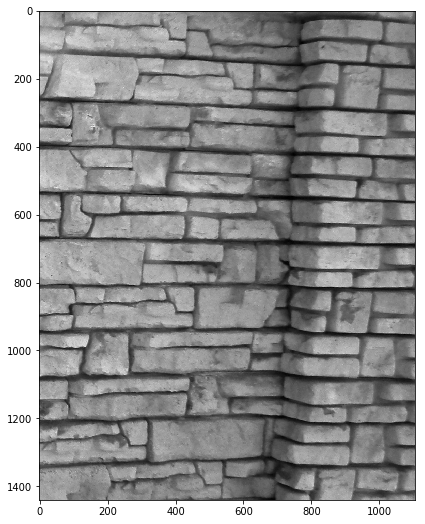

In [7]:
fig=plt.figure(figsize=(14,9))
_=plt.imshow(img,cmap="gray")

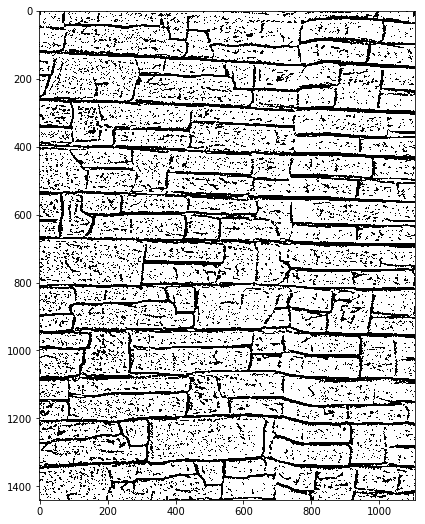

In [34]:
edges=cv2.adaptiveThreshold(img,255,cv2.THRESH_BINARY,cv2.ADAPTIVE_THRESH_MEAN_C,15,3)
cv2.imwrite("walledges.png",edges)
fig=plt.figure(figsize=(14,9))
_=plt.imshow(edges,cmap="gray")

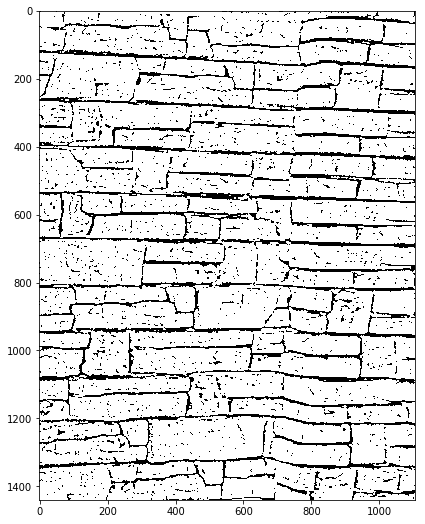

In [35]:
edges2=cv2.erode(edges,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
edges2=cv2.dilate(edges2,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
#edges2=cv2.erode(edges2,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
#edges2=cv2.dilate(edges2,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
cv2.imwrite("walledges.png",edges2)
fig=plt.figure(figsize=(14,9))
_=plt.imshow(edges2,cmap="gray")

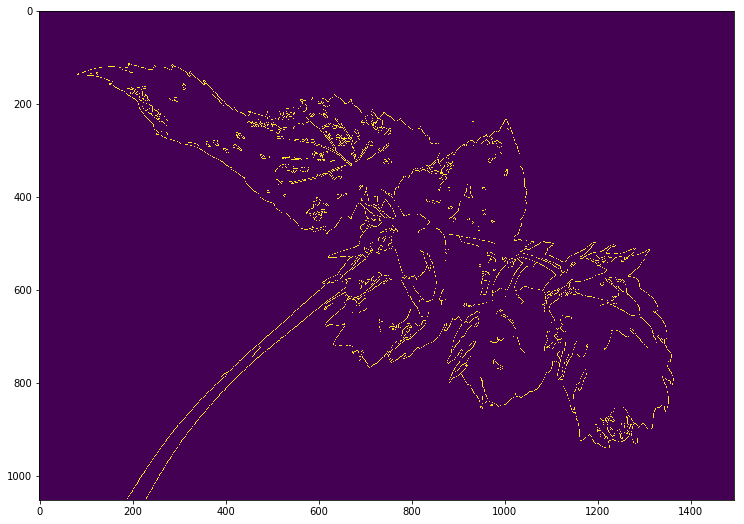

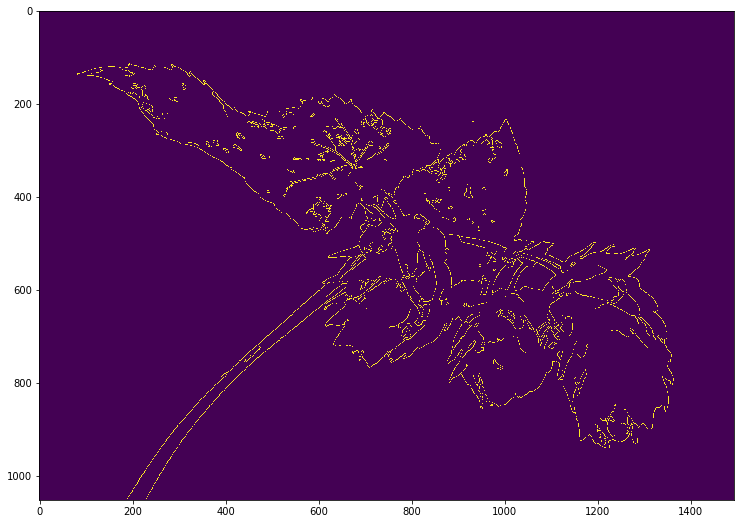

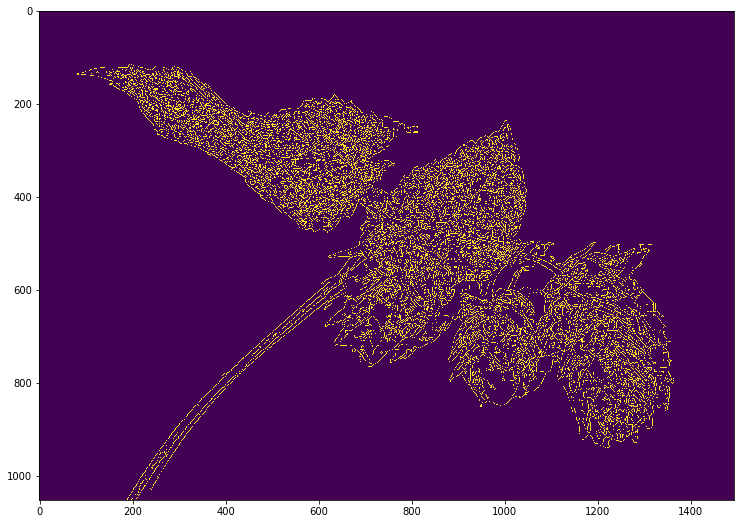

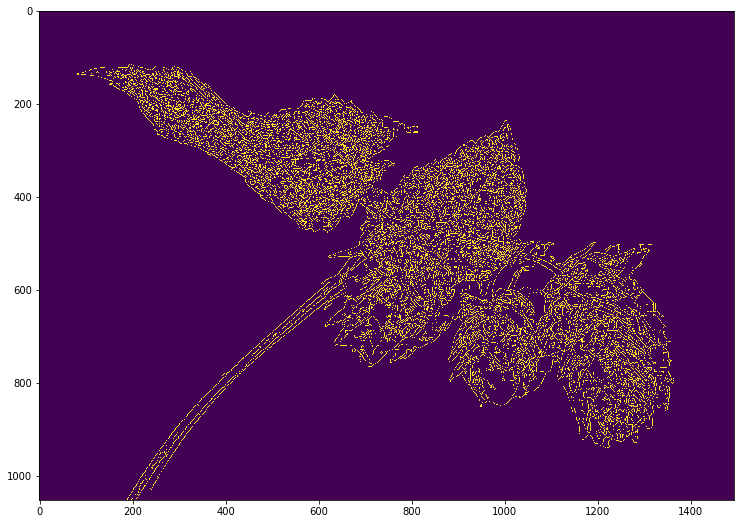

In [54]:
edgesum=None
for img in [gs,hops_img[...,1],hsv[...,1]]:
    gshalf=cv2.resize(img,(0,0),fx=0.5,fy=0.5)
    edges = cv2.Canny(cv2.GaussianBlur(gshalf,(0,0),1),100,1,edges,3,False)
    fig=plt.figure(figsize=(14,9))
    plt.imshow(edges)
    plt.show()
    if edgesum is None:
        edgesum=edges
    else:
        edgesum+=edges

fig=plt.figure(figsize=(14,9))
plt.imshow(edgesum/3.0)


(1052, 1494)
(1052, 1494)


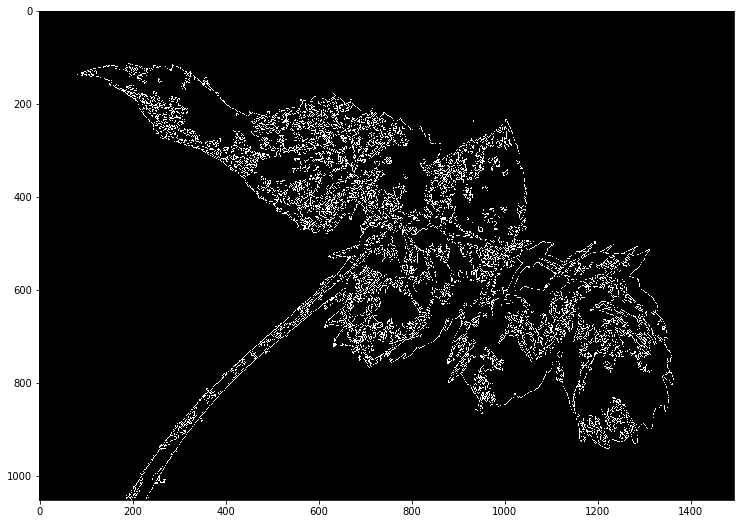

In [72]:
gshalf=cv2.resize(gs,(0,0),fx=0.5,fy=0.5)
print(gshalf.shape)
sharp = 3*gshalf-cv2.GaussianBlur(gshalf,(0,0),1)-cv2.GaussianBlur(gshalf,(0,0),3)
print(sharp.shape)
edges=np.zeros_like(sharp)
edges = cv2.Canny(sharp,300,10,edges,3,False)
fig=plt.figure(figsize=(14,9))
plt.imshow(edges,cmap='gray')
plt.show()



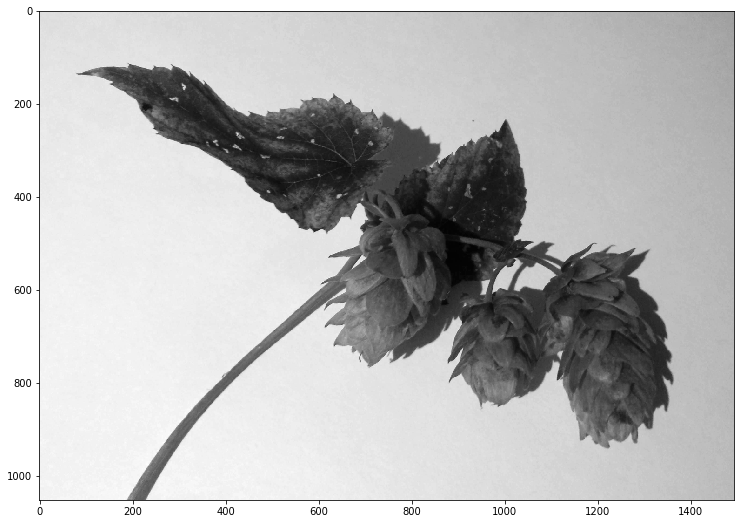

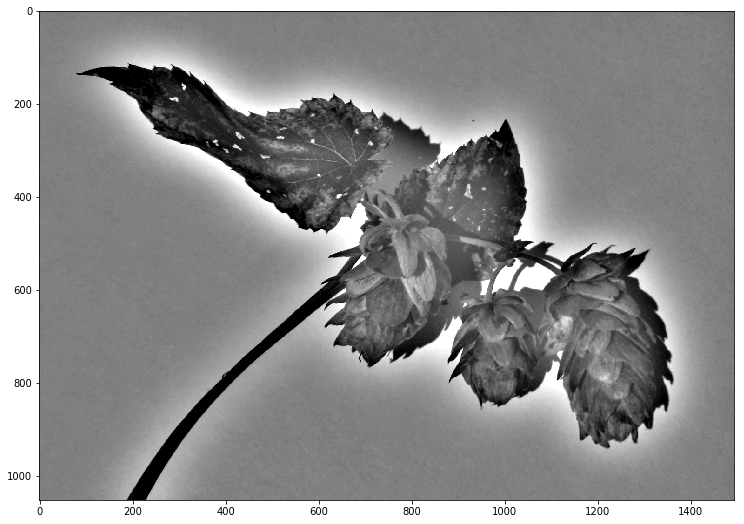

uint8 (1052, 1494) 255


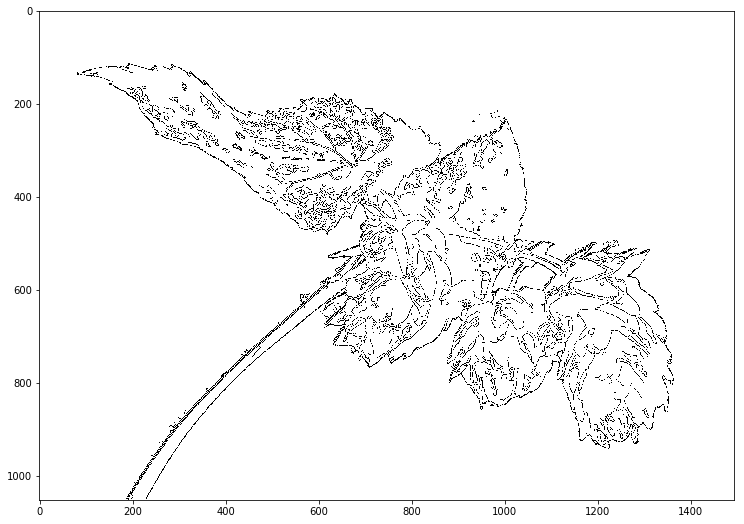

In [114]:
gshalf=cv2.resize(gs,(0,0),fx=0.5,fy=0.5)
greenhalf=cv2.resize(hops_img[...,1],(0,0),fx=0.5,fy=0.5)
gshalffloat=gshalf/255.0

ksize=50
im1=cv2.GaussianBlur(gshalffloat,(0,0),ksize)
im2=cv2.GaussianBlur((gshalffloat-im1)**2,(0,0),ksize)

#plt.imshow(im2,cmap='gray')

enhanced=(np.clip((gshalffloat-im1)/(.5+im2)+0.5,0,1)*255).astype(np.uint8)

fig=plt.figure(figsize=(14,9))
plt.imshow(greenhalf,cmap='gray')
plt.show()
fig=plt.figure(figsize=(14,9))
plt.imshow(enhanced,cmap='gray')
plt.show()
edges=np.zeros_like(enhanced)
edges2=np.zeros_like(enhanced)
edges=cv2.Canny(enhanced,25000,500,edges,7,True)+cv2.Canny(cv2.GaussianBlur(cv2.resize(gs,(0,0),fx=0.5,fy=0.5),(0,0),1),100,1,edges2,3,False)
edges[edges>100]=255
edges=(255-edges)
#edges[greenhalf<40]=128
print(edges.dtype,edges.shape,np.max(edges))
fig=plt.figure(figsize=(14,9))
plt.imshow(edges,cmap='gray')
plt.show()
